In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pylab

In [6]:
import seaborn as sns

In [7]:
import statsmodels.formula.api as smf

In [8]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [132]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [14]:
data1 = pd.read_csv(r'C:\Users\Abhishek\Documents\Data analyst\3-Data analytics and ML\Practical exam\Data Set for ML & R Practical Exam Paper_1979\Advertising.csv')

In [15]:
data1.head()

,Sno,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [16]:
data1.shape

(200, 5)

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [20]:
data1.describe()

,Sno,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [21]:
data1.isnull().sum()

Sno          0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

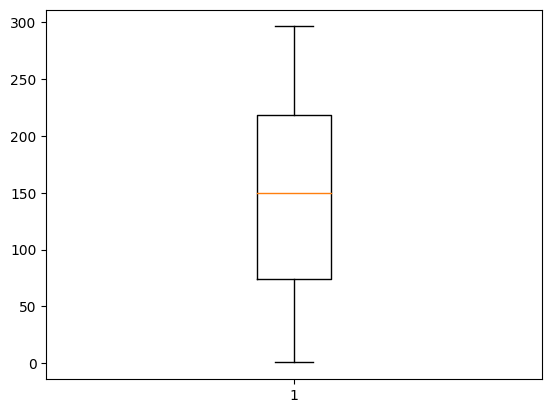

In [24]:
plt.boxplot(data1.TV)
plt.show()

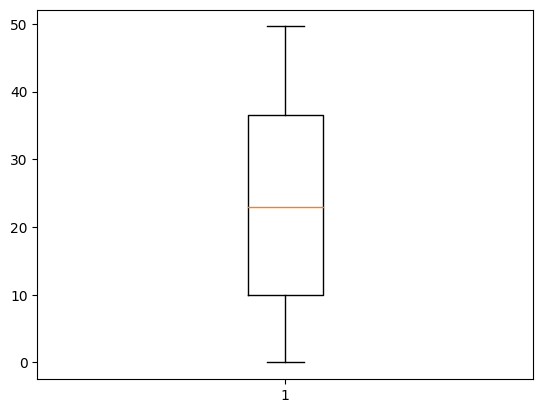

In [25]:
plt.boxplot(data1.Radio)
plt.show()

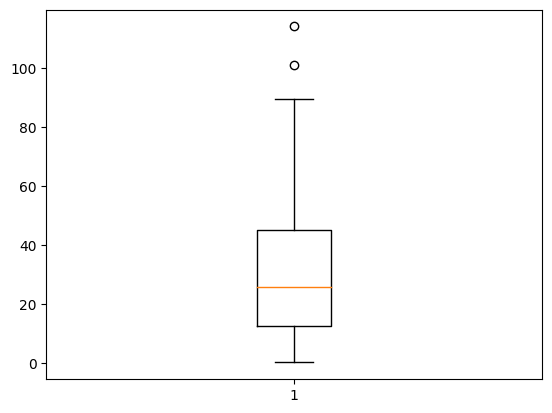

In [28]:
plt.boxplot(data1.Newspaper)
plt.show()

In [30]:
data1.Newspaper[data1.Newspaper > 80]

16     114.0
75      89.4
101    100.9
165     84.8
Name: Newspaper, dtype: float64

In [31]:
data1[data1.Newspaper > 80]

,Sno,TV,Radio,Newspaper,Sales
16,17,67.8,36.6,114.0,12.5
75,76,16.9,43.7,89.4,8.7
101,102,296.4,36.3,100.9,23.8
165,166,234.5,3.4,84.8,11.9


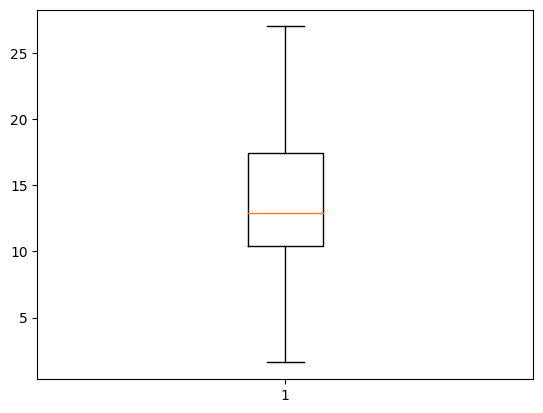

In [32]:
plt.boxplot(data1.Sales)
plt.show()

In [35]:
data1 = data1.drop(['Sno'], axis = 1)

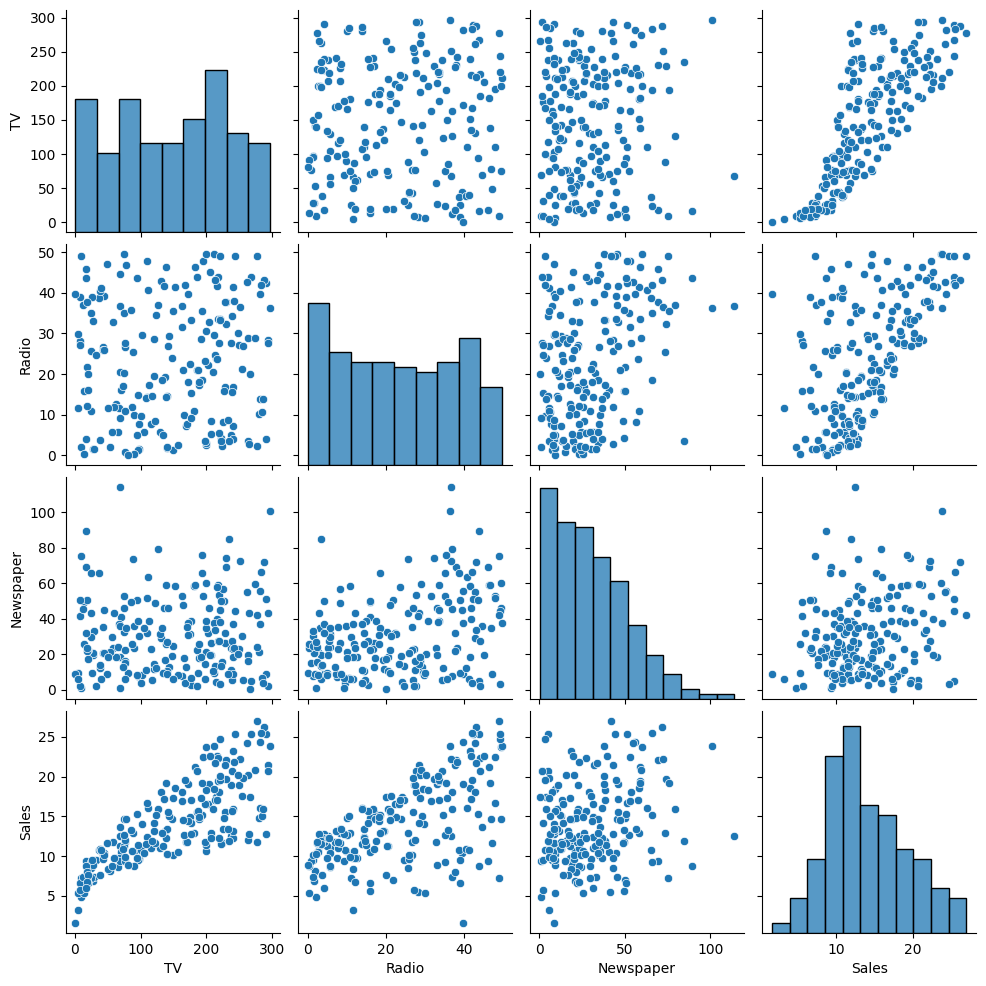

In [36]:
sns.pairplot(data1)

In [37]:
data1.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot: >

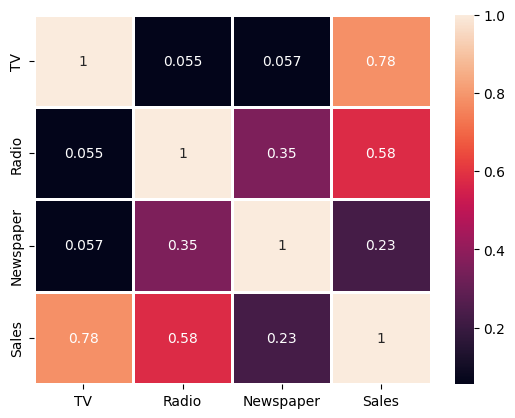

In [45]:
sns.heatmap(data1.corr(), annot=True, linewidth = 2 )

In [47]:
model1 = smf.ols('Sales ~ TV + Radio + Newspaper', data = data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        15:04:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model1.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [53]:
pred01 = model1.predict(data1[['TV', 'Radio', 'Newspaper']])

In [55]:
pred01.corr(data1.Sales)

0.9472120344352432

In [57]:
modelN = smf.ols('Sales ~ Newspaper', data = data1).fit()

In [58]:
modelN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sat, 18 Feb 2023   Prob (F-statistic):            0.00115
Time:                        15:12:05   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

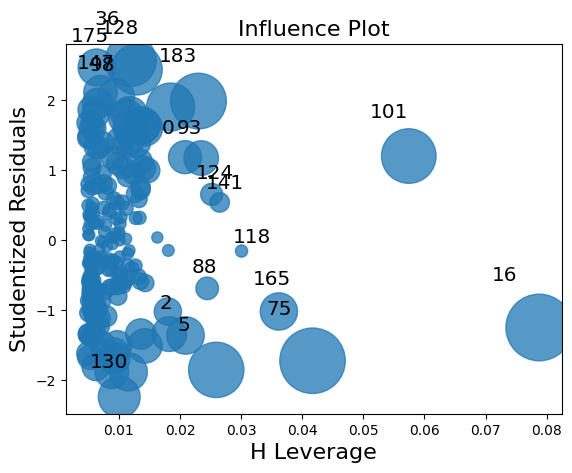

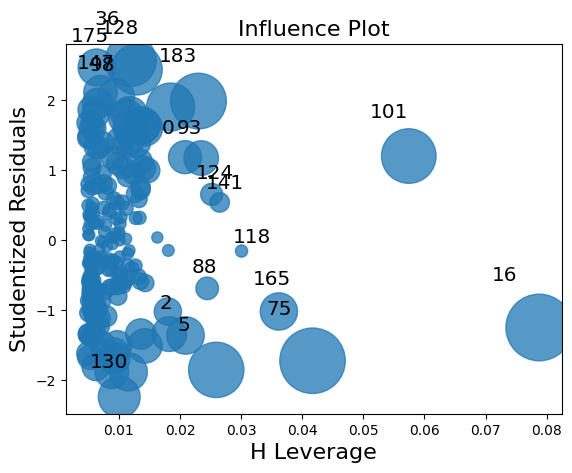

In [59]:
sm.graphics.influence_plot(modelN)

In [74]:
data2 = data1.drop(data1.index[[16,75,101,175]], axis=0)

In [75]:
modelN1 = smf.ols('Sales ~ Newspaper', data = data2).fit()

In [76]:
modelN1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     11.52
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           0.000835
Time:                        15:21:01   Log-Likelihood:                -592.24
No. Observations:                 196   AIC:                             1188.
Df Residuals:                     194   BIC:                             1195.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1643      0.633     19.203      0.000      10.915      13.414
Newspaper      0.0604      0.018      3.394      0.001       0.025       0.096
==============================================================================
Omnibus:                        5.450   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                4.840
Skew:                           0.310   Prob(JB):                       0.0889
Kurtosis:                       2.543   Cond. No.                         63.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

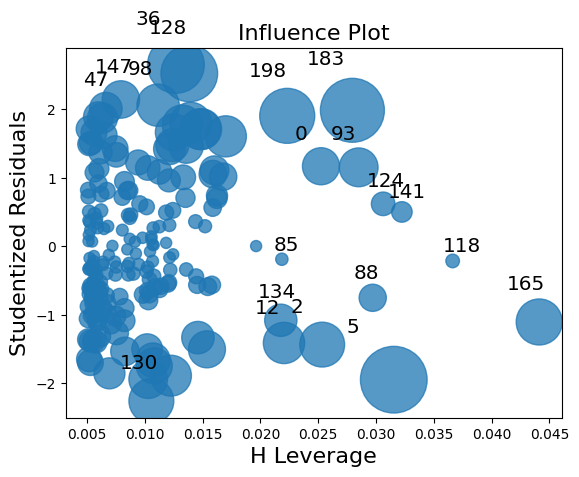

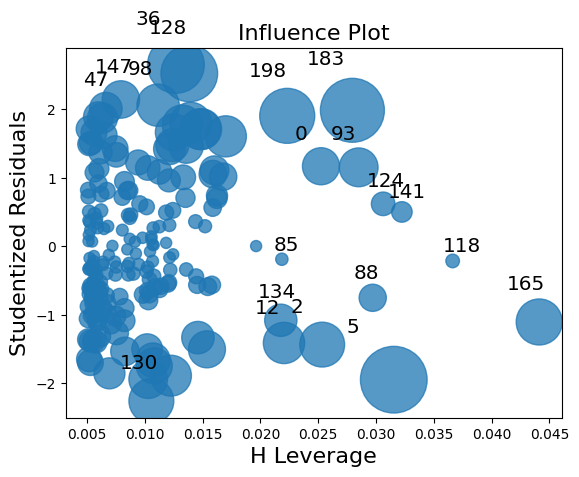

In [77]:
sm.graphics.influence_plot(modelN1)

In [78]:
data3 = data1.drop(data1.index[[198,183,36,165,128]], axis=0)

In [79]:
 modelN2 = smf.ols('Sales ~ Newspaper', data = data3).fit()

In [80]:
modelN2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     11.72
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           0.000754
Time:                        15:21:40   Log-Likelihood:                -584.87
No. Observations:                 195   AIC:                             1174.
Df Residuals:                     193   BIC:                             1180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0906      0.609     19.845      0.000      10.889      13.292
Newspaper      0.0567      0.017      3.424      0.001       0.024       0.089
==============================================================================
Omnibus:                        5.375   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                4.253
Skew:                           0.253   Prob(JB):                        0.119
Kurtosis:                       2.484   Cond. No.                         64.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
modelTR = smf.ols('Sales ~ TV+Radio', data = data1).fit()

In [83]:
modelTR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           4.83e-98
Time:                        15:28:08   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

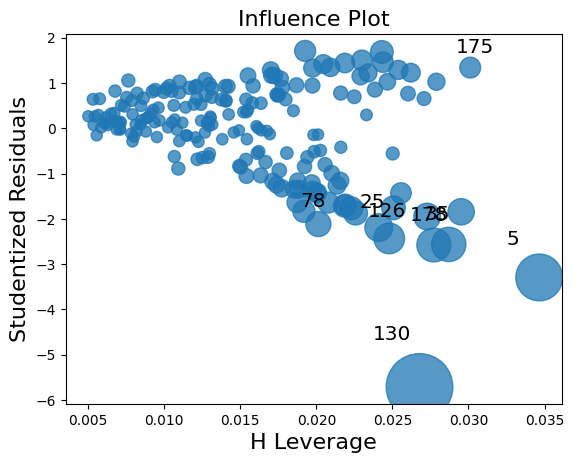

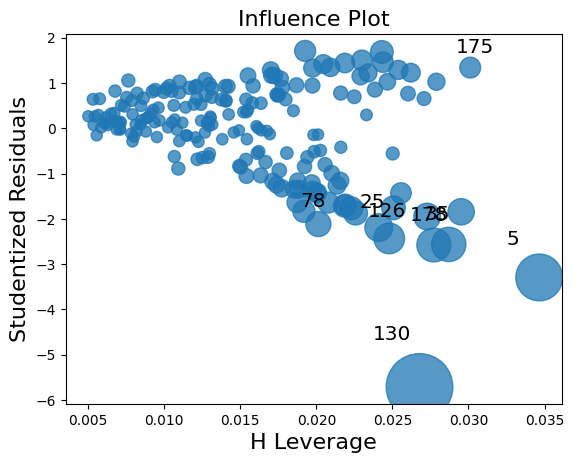

In [84]:
sm.graphics.influence_plot(modelTR)

In [87]:
data4 = data1.drop(data1.index[[130,5]], axis=0)

In [88]:
modelTR1 = smf.ols('Sales ~ TV+Radio', data = data4).fit()
modelTR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1045.
Date:                Sat, 18 Feb 2023   Prob (F-statistic):          6.26e-105
Time:                        15:32:03   Log-Likelihood:                -361.14
No. Observations:                 198   AIC:                             728.3
Df Residuals:                     195   BIC:                             738.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0519      0.265     11.505      0.000       2.529       3.575
TV             0.0442      0.001     34.837      0.000       0.042       0.047
Radio          0.1953      0.007     26.697      0.000       0.181       0.210
==============================================================================
Omnibus:                       16.435   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.512
Skew:                          -0.747   Prob(JB):                     9.55e-05
Kurtosis:                       3.105   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

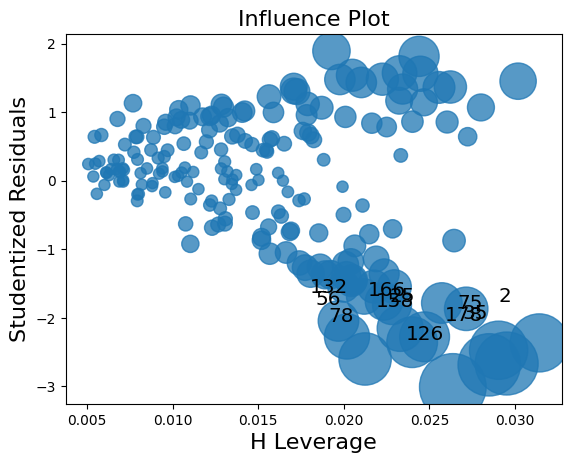

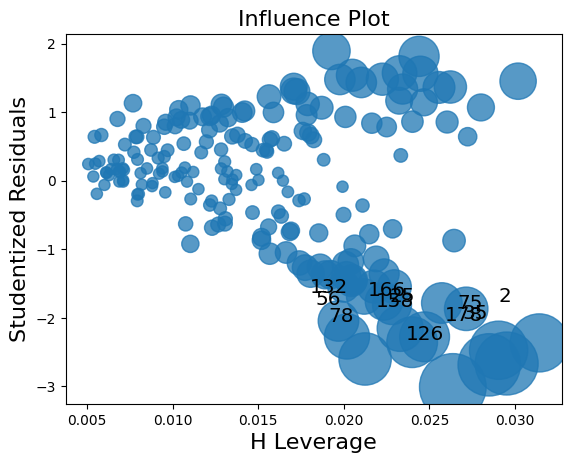

In [91]:
sm.graphics.influence_plot(modelTR1)

In [96]:
modelTN = smf.ols('Sales ~ TV+Newspaper', data = data4).fit()
modelTN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     171.3
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           1.14e-43
Time:                        15:35:15   Log-Likelihood:                -504.37
No. Observations:                 198   AIC:                             1015.
Df Residuals:                     195   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9079      0.531     11.133      0.000       4.861       6.955
TV             0.0462      0.003     17.674      0.000       0.041       0.051
Newspaper      0.0444      0.010      4.316      0.000       0.024       0.065
==============================================================================
Omnibus:                        0.566   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.754   Jarque-Bera (JB):                0.317
Skew:                          -0.071   Prob(JB):                        0.854
Kurtosis:                       3.134   Cond. No.                         415.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
modelRN = smf.ols('Sales ~ Radio+Newspaper', data = data4).fit()
modelRN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     60.75
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           3.11e-21
Time:                        15:35:47   Log-Likelihood:                -556.82
No. Observations:                 198   AIC:                             1120.
Df Residuals:                     195   BIC:                             1130.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0415      0.598     15.111      0.000       7.861      10.222
Radio          0.2129      0.021     10.182      0.000       0.172       0.254
Newspaper      0.0056      0.014      0.390      0.697      -0.023       0.034
==============================================================================
Omnibus:                       13.577   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.945
Skew:                          -0.673   Prob(JB):                     0.000569
Kurtosis:                       2.998   Cond. No.                         91.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
rsq_TV= smf.ols('TV~Radio + Newspaper', data = data1). fit().rsquared
vif_TV=1 / (1-rsq_TV)
print(rsq_TV, vif_TV)

0.004589623174239388 1.00461078493965


In [99]:
rsq_Radio= smf.ols('Radio~TV + Newspaper', data = data1). fit().rsquared
vif_Radio=1 / (1-rsq_Radio)
print(rsq_Radio, vif_Radio)

0.1266008772420567 1.1449519171055353


In [100]:
rsq_Newspaper= smf.ols('Newspaper~Radio + TV', data = data1). fit().rsquared
vif_Newspaper=1 / (1-rsq_Newspaper)
print(rsq_Newspaper, vif_Newspaper)

0.1267804565622349 1.1451873787239286


eval_env: 1
eval_env: 1
eval_env: 1


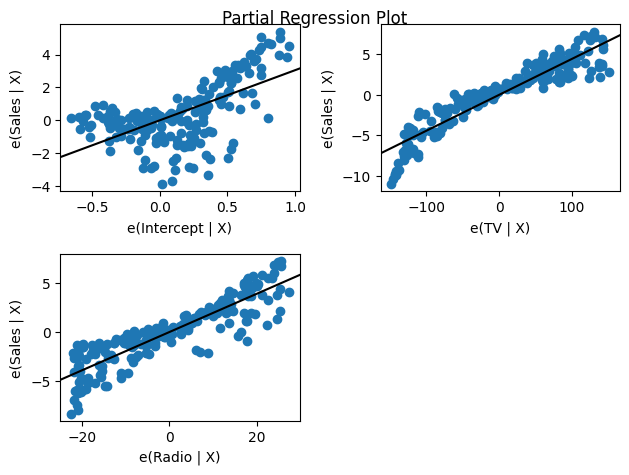

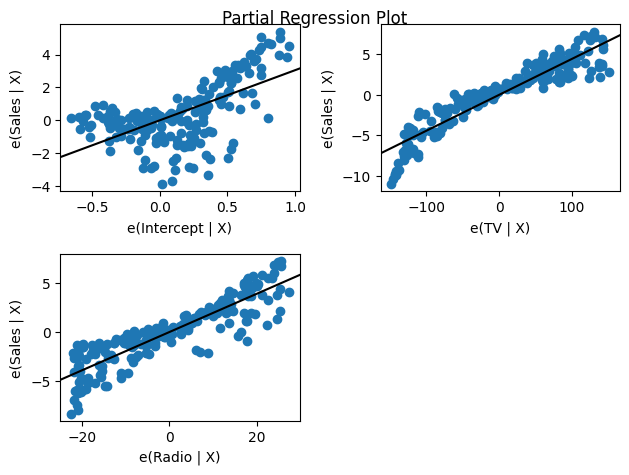

In [101]:
sm.graphics.plot_partregress_grid(modelTR1)

In [105]:
pred02 = modelTR1.predict(data4[['TV','Radio']])

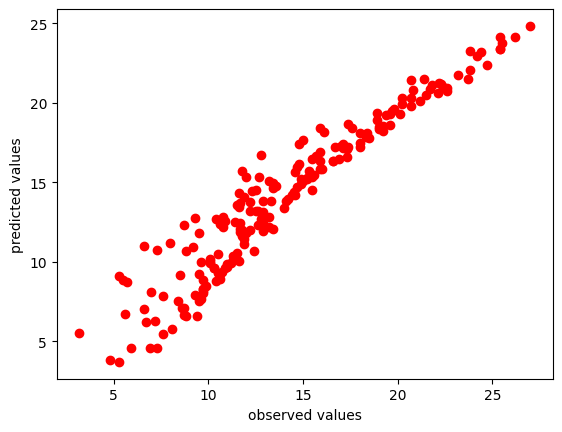

In [108]:
plt.scatter(data4.Sales, pred02, c='r')
plt.xlabel ("observed values")
plt.ylabel("predicted values")
plt.show()

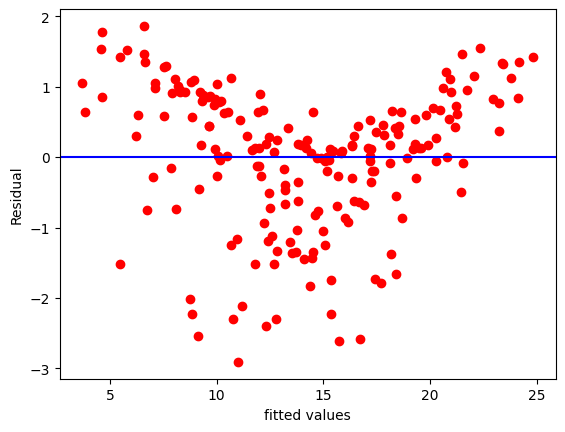

In [111]:
plt.scatter(pred02, modelTR1.resid_pearson , c='r')
plt.axhline(y=0, color = 'blue')
plt.xlabel("fitted values")
plt.ylabel("Residual")
plt.show()

In [110]:
modelTR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1045.
Date:                Sat, 18 Feb 2023   Prob (F-statistic):          6.26e-105
Time:                        15:55:38   Log-Likelihood:                -361.14
No. Observations:                 198   AIC:                             728.3
Df Residuals:                     195   BIC:                             738.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0519      0.265     11.505      0.000       2.529       3.575
TV             0.0442      0.001     34.837      0.000       0.042       0.047
Radio          0.1953      0.007     26.697      0.000       0.181       0.210
==============================================================================
Omnibus:                       16.435   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.512
Skew:                          -0.747   Prob(JB):                     9.55e-05
Kurtosis:                       3.105   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

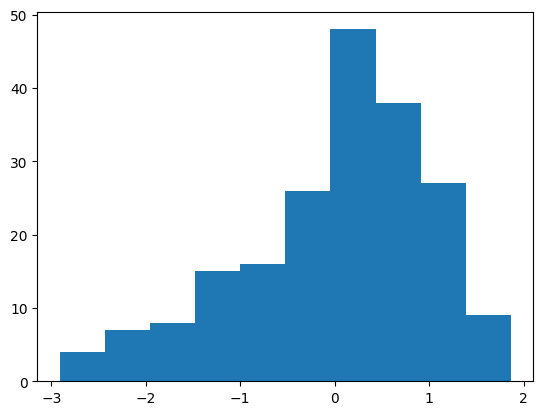

In [113]:
plt.hist(modelTR1.resid_pearson)
plt.show()

In [118]:
train,test = train_test_split(data4, test_size =0.2)

In [146]:
print(data4.shape, train.shape, test.shape)

(198, 4) (158, 4) (40, 4)


In [147]:
modelTR2 = smf.ols('Sales ~ TV+Radio', data= train).fit()

In [148]:
modelTR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     919.2
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           1.08e-86
Time:                        17:08:59   Log-Likelihood:                -286.96
No. Observations:                 158   AIC:                             579.9
Df Residuals:                     155   BIC:                             589.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0206      0.286     10.569      0.000       2.456       3.585
TV             0.0447      0.001     32.156      0.000       0.042       0.047
Radio          0.1952      0.008     24.096      0.000       0.179       0.211
==============================================================================
Omnibus:                       10.727   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.600
Skew:                          -0.663   Prob(JB):                      0.00303
Kurtosis:                       2.937   Cond. No.                         408.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
pred03 = modelTR2.predict(train[['TV','Radio']])

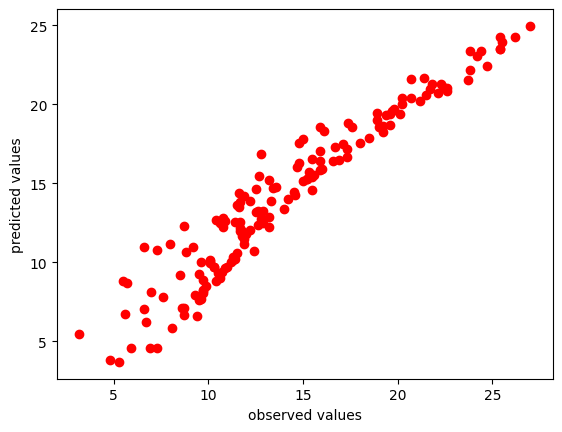

In [150]:
plt.scatter(train.Sales, pred03, c='r')
plt.xlabel ("observed values")
plt.ylabel("predicted values")
plt.show()

In [151]:
pred04 = modelTR2.predict(test[['TV','Radio']])

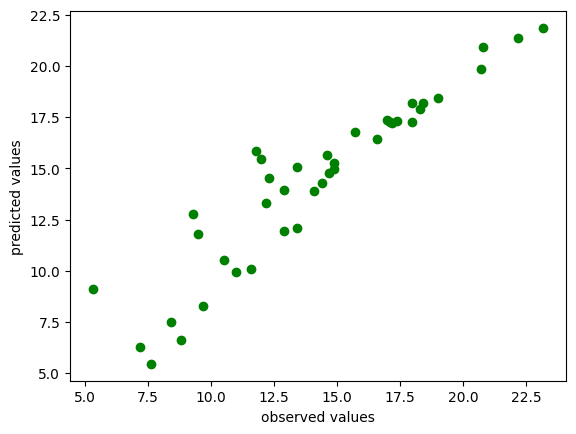

In [152]:
plt.scatter(test.Sales, pred04, c='g')
plt.xlabel ("observed values")
plt.ylabel("predicted values")
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1


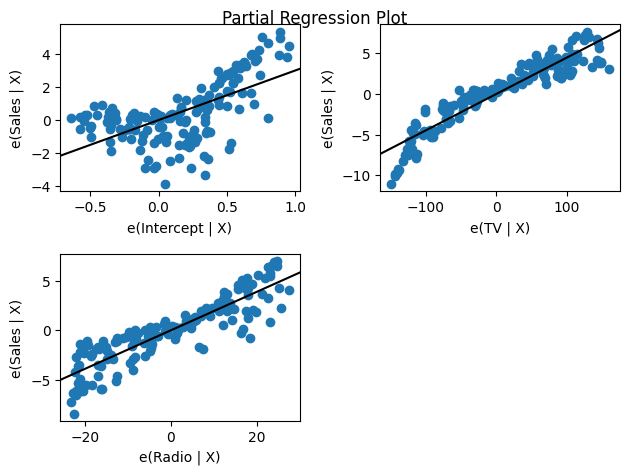

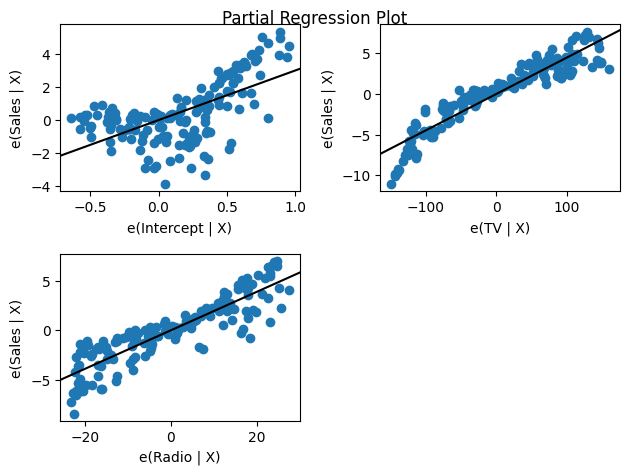

In [153]:
sm.graphics.plot_partregress_grid(modelTR2)

In [154]:
modelTR2.params

Intercept    3.020611
TV           0.044747
Radio        0.195159
dtype: float64